<a href="https://colab.research.google.com/github/deepasoman93/Car-Price-Prediction/blob/main/used_car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# USED CAR PREDICTION PRICE

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQNX505OF28zyg_MSiFs50R0YSAmjGm0DTaOQ&usqp=CAU">

# Problem definition


This project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using regression machine learning algorithms to solve this problem.

In [35]:
#loading required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Gathering

In [36]:
dataset = pd.read_csv('/content/car_dataset.csv')

# Data Preparation

In [37]:
#checking no. of rows and columns in dataset
dataset.shape

(301, 9)

This dataset contains 301 rows and 9 columns

In [38]:
#Checking the data type of columns.
#this step is important because sometimes dataset may contain wrong datatype of the feature.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Good! every data type is correctly mentioned. We need not to make any changes.

In [39]:
#check statistical summary of all the columns with numerical values.
dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [40]:
#check if there is any missing value in the dataset
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

There are no missing values in the dataset

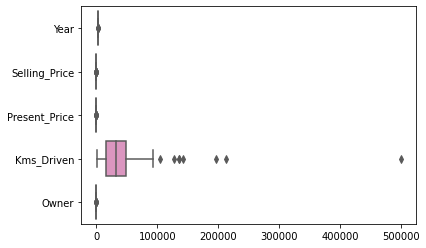

In [41]:
#check if there is any outliers in the dataset
sns.boxplot(data=dataset, orient='h', palette='Set2')

{'boxes': [<matplotlib.lines.Line2D at 0x7fe4af89fb10>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe4af9eb350>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe4af9dd390>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe4af9ebe10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe4af373890>,
  <matplotlib.lines.Line2D at 0x7fe4af373dd0>]}

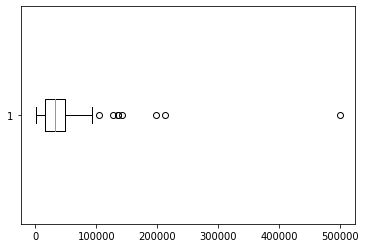

In [42]:
bp = plt.boxplot(dataset['Kms_Driven'], vert=False)
bp

In [43]:
print(np.percentile(dataset['Kms_Driven'],90))
print(np.percentile(dataset['Kms_Driven'],95))
print(np.percentile(dataset['Kms_Driven'],99))

65000.0
80000.0
142000.0


In [44]:
#replace the outliers
from statistics import median
median = median(dataset['Kms_Driven'])
dataset['Kms_Driven'] = np.where(dataset['Kms_Driven'] >142000.0, median,dataset['Kms_Driven'])
dataset['Kms_Driven'].describe()

count       301.000000
mean      34242.302326
std       24524.976083
min         500.000000
25%       15000.000000
50%       32000.000000
75%       47000.000000
max      142000.000000
Name: Kms_Driven, dtype: float64

# Create new variable


In [45]:
#adding a column with the current year
dataset['Current_Year']=2020
dataset.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [46]:
#creating a new column which will be age of vehicles; new feature
dataset['Vehicle_Age'] = dataset['Current_Year'] - dataset['Year']
dataset.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Vehicle_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [47]:
#getting dummies for these columns with help of pandas library
dataset = pd.get_dummies(dataset,columns=['Fuel_Type','Transmission','Seller_Type'],drop_first=True)

In [48]:
#dropping the columns which are redundant and irrelevant
dataset.drop(columns = ['Year'],inplace=True)
dataset.drop(columns = ['Current_Year'],inplace=True)
dataset.drop(columns = ['Car_Name'],inplace=True)

In [49]:
#check out the dataset with new changes
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Vehicle_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Seller_Type_Individual
0,3.35,5.59,27000,0,6,0,1,1,0
1,4.75,9.54,43000,0,7,1,0,1,0
2,7.25,9.85,6900,0,3,0,1,1,0
3,2.85,4.15,5200,0,9,0,1,1,0
4,4.60,6.87,42450,0,6,1,0,1,0


<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    



# **Data Exploration**

In [50]:
dataset.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Vehicle_Age',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Transmission_Manual',
       'Seller_Type_Individual'],
      dtype='object')

In [51]:
# Listing categorical columns for checking data imbalance and plotting them
col_category = ['Owner', 'Vehicle_Age',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Transmission_Manual',
       'Seller_Type_Individual']

col_numeric = ['Selling_Price', 'Present_Price','Kms_Driven']

## Data Distribution

<Figure size 864x864 with 0 Axes>

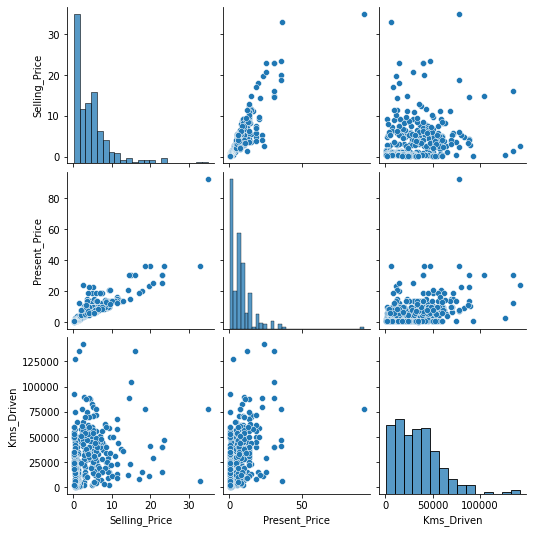

In [52]:
# Visualising the numerical variables
plt.figure(figsize=(12,12))
sns.pairplot(dataset[col_numeric])
plt.show()

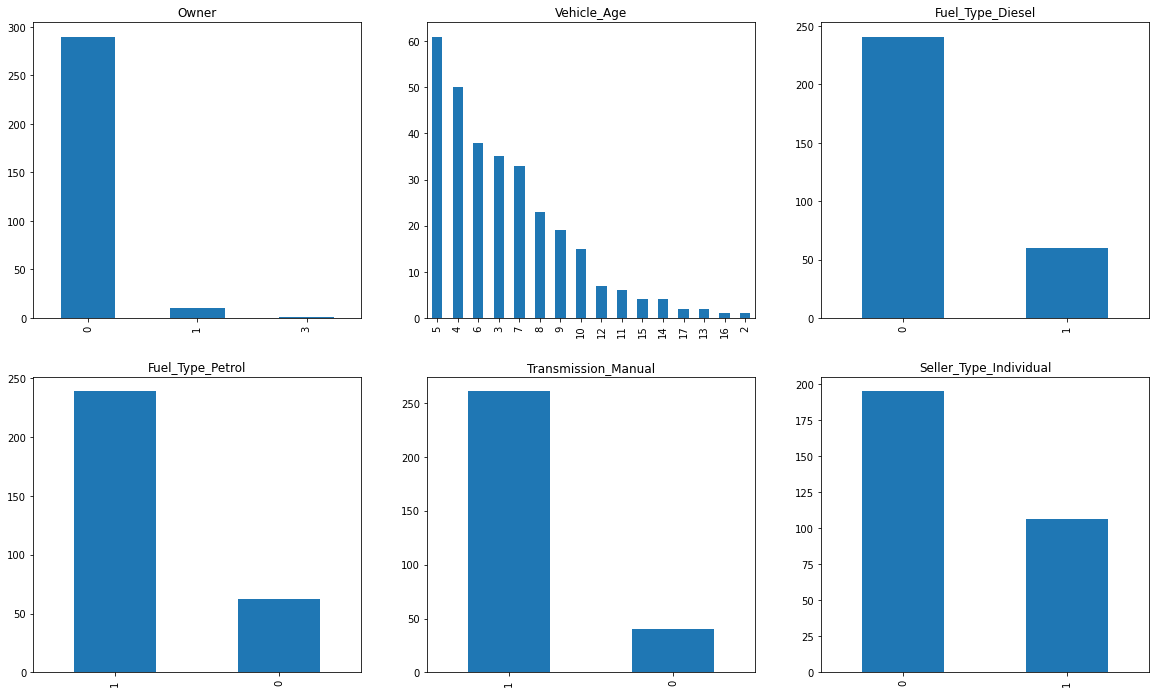

In [53]:
k=0
plt.figure(figsize=(20,25))
for col in col_category:    
    k=k+1
    plt.subplot(4, 3,k)    
    dataset[col].value_counts().plot(kind='bar');
    plt.title(col)

# Data Distribution with respect to the Selling Price

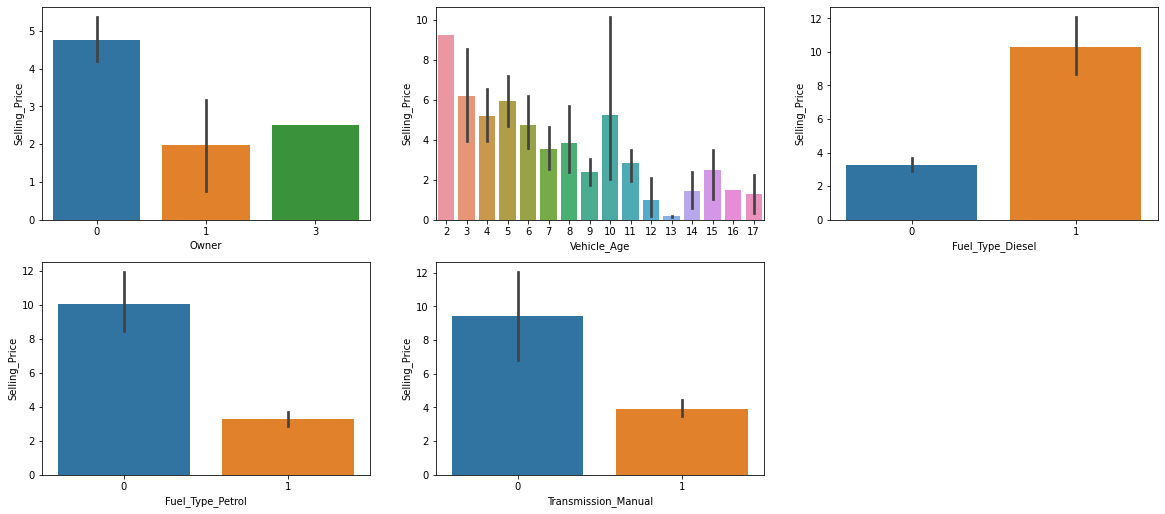

In [54]:
# barplot for all categorical variables except CarCompany
# As X labels are not clearly visible for CarCompany. It is plotted in the next cell with bigger figure size.
k=0
plt.figure(figsize=(20,18))
for col in range (len(col_category)-1):    
    k=k+1
    plt.subplot(4, 3, k)   
    ax = sns.barplot(x = col_category[col], y = 'Selling_Price', data = dataset)

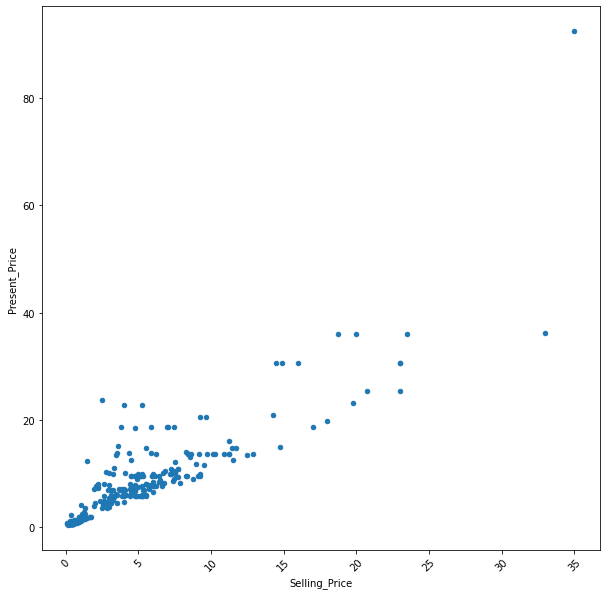

In [55]:
dataset.plot.scatter(x ='Selling_Price', y = 'Present_Price', rot=45, figsize=(10, 10))
plt.show()

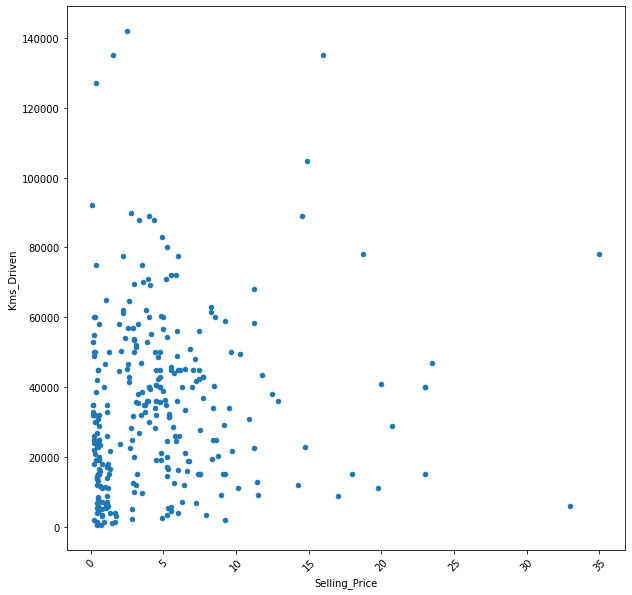

In [56]:
dataset.plot.scatter(x ='Selling_Price', y = 'Kms_Driven', rot=45, figsize=(10, 10))
plt.show()

# Correlation

### Heat map

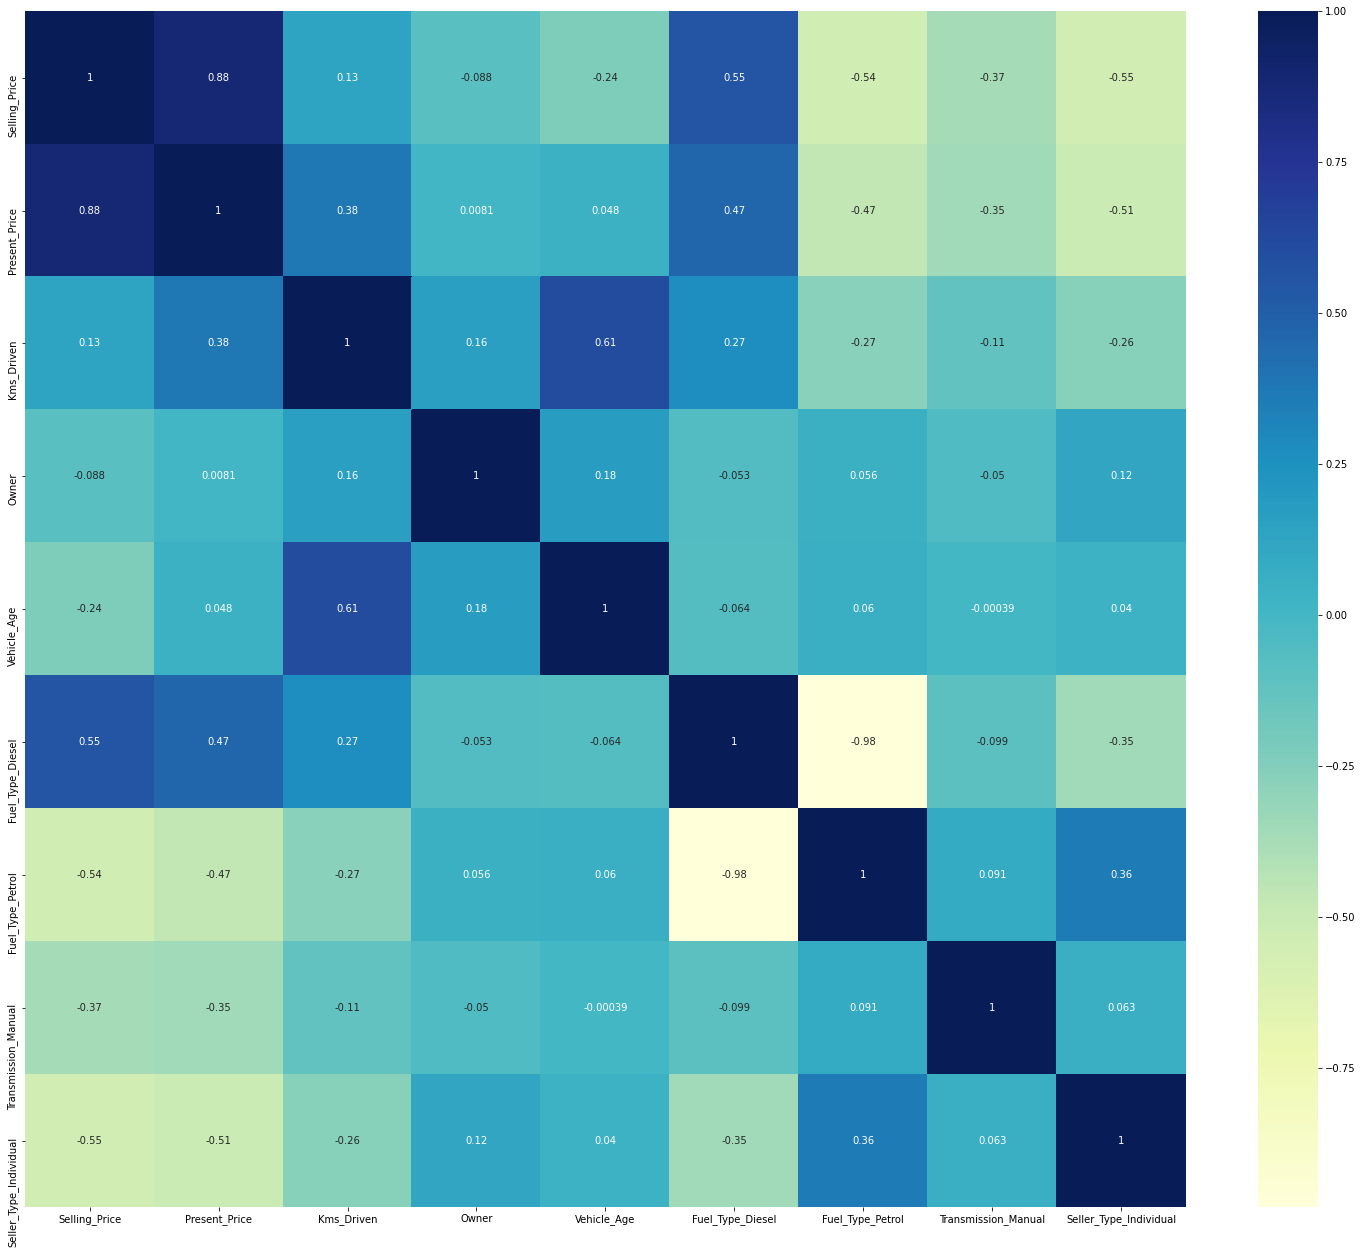

In [57]:
#create correlation matrix
correlations = dataset.corr()
indx=correlations.index

#plot this correlation for clear visualisation
plt.figure(figsize=(26,22))
#annot = True , dsiplays text over the cells.
#cmap = "YlGnBu" is nothing but adjustment of colors for our heatmap
sns.heatmap(dataset[indx].corr(),annot=True,cmap="YlGnBu")
#amount of darkness shows how our features are correalated with each other 


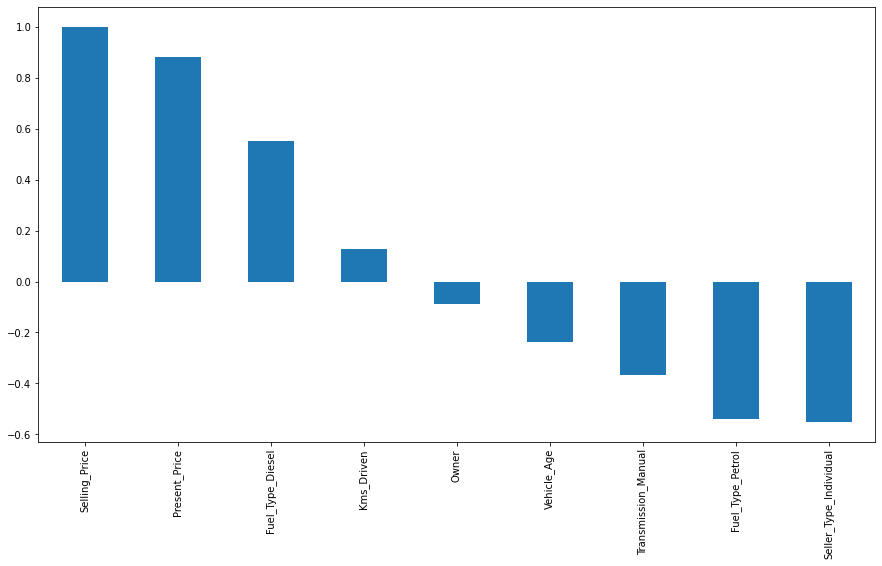

In [58]:
#Get Correlation of "selling price" with other variables:
plt.figure(figsize=(15,8))
dataset.corr()['Selling_Price'].sort_values(ascending = False).plot(kind='bar')

### Features and target variable

In [59]:
# taking all the features except "selling price"
X = dataset.iloc[:,1:]
# taking "selling price" as y , as it is our target variable
y = dataset.iloc[:,0]

### Feature Importance

In [60]:
#checking and comparing the importance of features
from sklearn.ensemble import ExtraTreesRegressor
#creating object
model = ExtraTreesRegressor()
#fit the model
model.fit(X,y)
print(model.feature_importances_)

[3.56154448e-01 4.20906321e-02 2.95855427e-04 7.70314111e-02
 2.30903258e-01 9.39094812e-03 1.44107276e-01 1.40026171e-01]


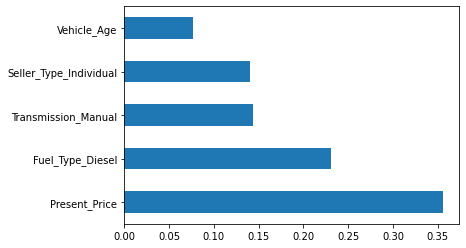

In [61]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
# considering top 5 important features
feat_importances.nlargest(5).plot(kind='barh')
plt.show()


### Splitting data into training and testing

In [62]:
#splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fitting and evaluating different models
Here I am using three models :
1. Linear Regression
2. Decision Tree
3. Random forest Regressor

I will fit these models and then choose one with the better accuracy.
You can use any regression model as per your choice.

## Linear Regression Model

In [63]:
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score
from sklearn.linear_model import LinearRegression

#creating object for linear regression
model_lin=LinearRegression()

#fitting the linear regression model
model_lin.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
# Predict on the test data: y_pred
y_pred = model_lin.predict(X_test)

In [65]:
from sklearn.metrics import r2_score, mean_squared_error
print("accuracy is: ", r2_score(y_test,y_pred))

accuracy is:  0.8641662898561523


In [66]:
#metrics
from sklearn import metrics
#print mean absolute error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
#print mean squared error
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
#print the root mean squared error
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.1916391054079158
MSE: 4.062250638437201
RMSE: 2.0155025771348445


## Decision tree Model

In [67]:
from sklearn.tree import DecisionTreeRegressor

#creating object for Decision tree
model_tree = DecisionTreeRegressor()

#fitting the decision tree model
model_tree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [68]:
# Predict on the test data: y_pred
y_pred = model_tree.predict(X_test)

In [69]:
print("accuracy is: ", r2_score(y_test,y_pred))

accuracy is:  0.9160618410792629


In [70]:
#print errors
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.8375824175824176
MSE: 2.510259340659341
RMSE: 1.5843797968477575


## Random Forest Model

In [71]:
from sklearn.ensemble import RandomForestRegressor

#creating object for Random forest regressor
model_rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

#fitting the rf model
model_rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [80]:
# Predict on the test data: y_pred
y_pred = model_rf.predict(X_test)

In [81]:
print("accuracy is: ", r2_score(y_test,y_pred))

accuracy is:  0.9113731670087943


In [82]:
#print errors
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.7511879120879118
MSE: 2.6504790932967013
RMSE: 1.6280292052959926


#### We want our R2 score to be maximum and other errors to be minimum for better results

### Random forest regressor is giving better results. therefore we will hypertune this model and then fit, predict.

# Hyperparamter tuning

In [83]:
#n_estimators = The number of trees in the forest.
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [84]:
from sklearn.model_selection import RandomizedSearchCV

#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [85]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [86]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [87]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [88]:
#fit the random forest model
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   0.3s
[CV] n_estimators=200, min_samples_spl

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  6.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [89]:
#displaying the best parameters
rf_random.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 300}

In [90]:
rf_random.best_score_

-3.758855215784385

# Final Predictions

In [91]:
#predicting against test data
y_pred=rf_random.predict(X_test)
#print the erros
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
R2 = metrics.r2_score(y_test,y_pred)
print('R2:',R2)

MAE: 0.7627852320186944
MSE: 2.5839458494960965
RMSE: 1.6074656604407127
R2: 0.9135979084533099


# Save the model

In [92]:
import pickle
# open a file, where you ant to store the data
file = open('car_price_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)